# ROAG Data Analysis

### Dataset and research details 
https://www.imperial.ac.uk/manipulation-touch/open-source/dataset/roag-dataset/

In [ ]:
# Import libraries
import pandas
import glob
import os

import sys as sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


## Data Processing

### Joint Locations and Joint Angle data

In [ ]:
# Extract files
joint_locations_directory = ""
joint_angle_directory = ""

directories = [joint_locations_directory, joint_angle_directory]
files = []
for directory in directories:
    file_pattern = os.path.join(directory, "*P07_unbraced*.csv")
    word_list = ['Elbow', 'Sh', 'Wrist', 'Interval']
    file_list = [f for f in glob.glob(file_pattern) if any(word in f for word in word_list)]
    files.extend(file_list)
    
files

In [56]:
def list_files(directories, pattern, keywords=None):
    if keywords is None:
        keywords = ['Elbow', 'Sh', 'Wrist']
    result_files = []
    for directory in directories:
        file_pattern = os.path.join(directory, pattern)
        matched_files = [f for f in glob.glob(file_pattern) if any(word in f for word in keywords)]
        result_files.extend(matched_files)
    return result_files

In [ ]:
# Combine files for each participant
participant_ids = ["P01", "P02", "P03", "P04", "P05", "P06", "P07"]

for participant_id in participant_ids:
    v_pattern = f"*{participant_id}_unbraced_v*.csv"
    v_files = list_files(directories, v_pattern)
    print(f"Files for {participant_id}: {v_files}")
    combined_v_dfs = combine_files(v_files)
    combined_v_dfs.columns = [clean_column(col) for col in combined_v_dfs.columns]
    h_pattern = f"*{participant_id}_unbraced_h*.csv"
    h_files = list_files(directories,h_pattern)
    print(f"Files for {participant_id}: {h_files}")
    combined_h_dfs = combine_files(h_files)
    combined_h_dfs.columns = [clean_column(col) for col in combined_h_dfs.columns]
    interval_file_pattern = os.path.join(intervals_directory, f"*{participant_id}_unbraced*.csv")
    interval_files = [f for f in glob.glob(interval_file_pattern) if any(word in f for word in word_list)]
    print(f"Files for {participant_id}: {interval_files}")

    v_intervals = pd.read_csv(interval_files[1])
    v_intervals = v_intervals.reset_index().rename(columns={'index': 'interval_no'})
    v_intervals['interval_no'] = v_intervals['interval_no'] + 1
    
    h_intervals = pd.read_csv(interval_files[0])
    h_intervals = h_intervals.reset_index().rename(columns={'index': 'interval_no'})
    h_intervals['interval_no'] = h_intervals['interval_no'] + 1
    
    def get_interval_label(idx, intervals_df):
        for _, row in intervals_df.iterrows():
            if row['0'] <= idx <= row['1']:
                return row['interval_no']
        return -1

    combined_v_dfs['interval_label'] = [get_interval_label(idx, v_intervals) for idx in combined_v_dfs.index]
    combined_h_dfs['interval_label'] = [get_interval_label(idx, h_intervals) for idx in combined_h_dfs.index]
    
    combined_v_dfs.to_csv(f'{participant_id}_v_data.csv', index=False)
    combined_h_dfs.to_csv(f'{participant_id}_h_data.csv', index=False)

In [61]:
def combine_files(files):
    dfs = []
    for file in files:
        df = pandas.read_csv(file)
        prefix = os.path.splitext(os.path.basename(file))[0]
        df = df.add_prefix(f"{prefix}_")
        dfs.append(df)
    combined_df = pandas.concat(dfs, axis=1)
    return combined_df

In [ ]:
import re

def clean_column(col):
    col = re.sub(r'P07_unbraced_', '', col)
    col = re.sub(r'_OM', '', col)
    col = re.sub(r'Angle_0', 'Angle_x', col)
    col = re.sub(r'Angle_1', 'Angle_y', col)
    col = re.sub(r'Angle_2', 'Angle_z', col)
    col = re.sub(r'_0', '_x', col)
    col = re.sub(r'_1', '_y', col)
    col = re.sub(r'_2', '_z', col)
    col = col.replace('R', '')
    return col

h_Elbow_x  h_Elbow_y  h_Elbow_z   h_Sh_x   h_Sh_y   h_Sh_z  h_Wrist_x  \
0    262.654   -631.946    396.307  200.655 -616.468  662.093    252.570   
1    262.681   -631.818    396.321  200.670 -616.480  662.101    252.642   
2    262.712   -631.704    396.335  200.685 -616.505  662.107    252.718   
3    262.750   -631.604    396.348  200.701 -616.541  662.110    252.798   
4    262.793   -631.521    396.357  200.718 -616.589  662.111    252.877   

   h_Wrist_y  h_Wrist_z  v_Elbow_x  ...  v_Elbow_Angle_x  v_Shoulder_Angle_x  \
0   -516.016    167.415    274.285  ...        29.749535          -44.581377   
1   -515.945    167.409    273.970  ...        29.747283          -44.649116   
2   -515.862    167.410    273.677  ...        29.746382          -44.670066   
3   -515.769    167.420    273.402  ...        29.742673          -44.647358   
4   -515.669    167.437    273.144  ...        29.730488          -44.584695   

   v_Shoulder_Angle_y  v_Shoulder_Angle_z  v_Wrist_Angle_x  v_Wrist_Angle_y  \
0           14.101497           51.600568        24.008042       -10.007349   
1           14.073418           51.826530        23.905869        -9.813654   
2           14.042884           51.944830        23.922267        -9.666178   
3           14.009948           51.981195        24.018665        -9.563924   
4           13.974692           51.972226        24.137678        -9.494151   

   v_Wrist_Angle_z  v_Wrist_Mid_x  v_Wrist_Mid_y  v_Wrist_Mid_z  
0        -9.569593        263.870       -493.856        161.568  
1        -9.578158        263.338       -494.140        161.679  
2        -9.592620        262.913       -494.389        161.813  
3        -9.608850        262.575       -494.617        161.963  
4        -9.613417        262.288       -494.843        162.120  

[5 rows x 38 columns]

In [62]:
combined_v_dfs = combine_files(v_files)
combined_v_dfs

P07_unbraced_v_RElbow_OM_0  P07_unbraced_v_RElbow_OM_1  \
0                         274.285                    -618.135   
1                         273.970                    -618.239   
2                         273.677                    -618.328   
3                         273.402                    -618.402   
4                         273.144                    -618.465   
...                           ...                         ...   
18574                     255.794                    -590.469   
18575                     255.965                    -590.297   
18576                     256.150                    -590.094   
18577                     256.346                    -589.856   
18578                     256.551                    -589.600   

       P07_unbraced_v_RElbow_OM_2  P07_unbraced_v_RSh_OM_0  \
0                         385.531                  219.729   
1                         385.730                  219.399   
2                         385.954                  219.069   
3                         386.202                  218.738   
4                         386.478                  218.407   
...                           ...                      ...   
18574                     412.747                  196.979   
18575                     412.743                  197.112   
18576                     412.741                  197.251   
18577                     412.738                  197.397   
18578                     412.741                  197.550   

       P07_unbraced_v_RSh_OM_1  P07_unbraced_v_RSh_OM_2  \
0                     -610.056                  655.224   
1                     -610.011                  655.414   
2                     -609.978                  655.607   
3                     -609.956                  655.803   
4                     -609.944                  656.003   
...                        ...                      ...   
18574                 -549.686                  675.393   
18575                 -549.505                  675.391   
18576                 -549.306                  675.394   
18577                 -549.091                  675.402   
18578                 -548.859                  675.413   

       P07_unbraced_v_RWrist_OM_0  P07_unbraced_v_RWrist_OM_1  \
0                         263.870                    -493.856   
1                         263.338                    -494.140   
2                         262.913                    -494.389   
3                         262.575                    -494.617   
4                         262.288                    -494.843   
...                           ...                         ...   
18574                     258.917                    -513.877   
18575                     259.126                    -513.651   
18576                     259.336                    -513.418   
18577                     259.544                    -513.184   
18578                     259.747                    -512.950   

       P07_unbraced_v_RWrist_OM_2  P07_unbraced_v_RElbow_Angle_0  \
0                         161.568                      29.749535   
1                         161.679                      29.747283   
2                         161.813                      29.746382   
3                         161.963                      29.742673   
4                         162.120                      29.730488   
...                           ...                            ...   
18574                     164.810                      23.949889   
18575                     164.824                      23.962433   
18576                     164.835                      23.968653   
18577                     164.843                      23.964675   
18578                     164.846                      23.957193   

       P07_unbraced_v_RShoulder_Angle_0  P07_unbraced_v_RShoulder_Angle_1  \
0                            -44.581377                         14.101497   
1                   

In [64]:
combined_h_dfs = combine_files(h_files)
combined_h_dfs

P07_unbraced_h_RElbow_OM_0  P07_unbraced_h_RElbow_OM_1  \
0                         262.654                    -631.946   
1                         262.681                    -631.818   
2                         262.712                    -631.704   
3                         262.750                    -631.604   
4                         262.793                    -631.521   
...                           ...                         ...   
19658                     260.654                    -595.115   
19659                     260.619                    -595.443   
19660                     260.588                    -595.709   
19661                     260.564                    -595.919   
19662                     260.547                    -596.075   

       P07_unbraced_h_RElbow_OM_2  P07_unbraced_h_RSh_OM_0  \
0                         396.307                  200.655   
1                         396.321                  200.670   
2                         396.335                  200.685   
3                         396.348                  200.701   
4                         396.357                  200.718   
...                           ...                      ...   
19658                     397.828                  225.264   
19659                     397.850                  225.261   
19660                     397.862                  225.266   
19661                     397.865                  225.277   
19662                     397.861                  225.292   

       P07_unbraced_h_RSh_OM_1  P07_unbraced_h_RSh_OM_2  \
0                     -616.468                  662.093   
1                     -616.480                  662.101   
2                     -616.505                  662.107   
3                     -616.541                  662.110   
4                     -616.589                  662.111   
...                        ...                      ...   
19658                 -522.021                  658.104   
19659                 -522.207                  658.109   
19660                 -522.352                  658.106   
19661                 -522.460                  658.092   
19662                 -522.532                  658.067   

       P07_unbraced_h_RWrist_OM_0  P07_unbraced_h_RWrist_OM_1  \
0                         252.570                    -516.016   
1                         252.642                    -515.945   
2                         252.718                    -515.862   
3                         252.798                    -515.769   
4                         252.877                    -515.669   
...                           ...                         ...   
19658                     273.117                    -545.183   
19659                     273.080                    -545.620   
19660                     273.017                    -546.033   
19661                     272.921                    -546.415   
19662                     272.792                    -546.758   

       P07_unbraced_h_RWrist_OM_2  P07_unbraced_h_RElbow_Angle_0  \
0                         167.415                      29.380020   
1                         167.409                      29.343488   
2                         167.410                      29.313274   
3                         167.420                      29.289145   
4                         167.437                      29.270873   
...                           ...                            ...   
19658                     143.123                      21.693077   
19659                     143.146                      21.694088   
19660                     143.136                      21.682756   
19661                     143.096                      21.663439   
19662                     143.034                      21.639571   

       P07_unbraced_h_RShoulder_Angle_0  P07_unbraced_h_RShoulder_Angle_1  \
0                            -51.512999                         16.791745   
1                   

In [63]:
combined_v_dfs.columns = [clean_column(col) for col in combined_v_dfs.columns]
combined_v_dfs.head()

v_Elbow_x  v_Elbow_y  v_Elbow_z   v_Sh_x   v_Sh_y   v_Sh_z  v_Wrist_x  \
0    274.285   -618.135    385.531  219.729 -610.056  655.224    263.870   
1    273.970   -618.239    385.730  219.399 -610.011  655.414    263.338   
2    273.677   -618.328    385.954  219.069 -609.978  655.607    262.913   
3    273.402   -618.402    386.202  218.738 -609.956  655.803    262.575   
4    273.144   -618.465    386.478  218.407 -609.944  656.003    262.288   

   v_Wrist_y  v_Wrist_z  v_Elbow_Angle_x  v_Shoulder_Angle_x  \
0   -493.856    161.568        29.749535          -44.581377   
1   -494.140    161.679        29.747283          -44.649116   
2   -494.389    161.813        29.746382          -44.670066   
3   -494.617    161.963        29.742673          -44.647358   
4   -494.843    162.120        29.730488          -44.584695   

   v_Shoulder_Angle_y  v_Shoulder_Angle_z  v_Wrist_Angle_x  v_Wrist_Angle_y  \
0           14.101497           51.600568        24.008042       -10.007349   
1           14.073418           51.826530        23.905869        -9.813654   
2           14.042884           51.944830        23.922267        -9.666178   
3           14.009948           51.981195        24.018665        -9.563924   
4           13.974692           51.972226        24.137678        -9.494151   

   v_Wrist_Angle_z  v_Wrist_Mid_x  v_Wrist_Mid_y  v_Wrist_Mid_z  
0        -9.569593        263.870       -493.856        161.568  
1        -9.578158        263.338       -494.140        161.679  
2        -9.592620        262.913       -494.389        161.813  
3        -9.608850        262.575       -494.617        161.963  
4        -9.613417        262.288       -494.843        162.120

In [65]:
combined_h_dfs.columns = [clean_column(col) for col in combined_h_dfs.columns]
combined_h_dfs.head()

h_Elbow_x  h_Elbow_y  h_Elbow_z   h_Sh_x   h_Sh_y   h_Sh_z  h_Wrist_x  \
0    262.654   -631.946    396.307  200.655 -616.468  662.093    252.570   
1    262.681   -631.818    396.321  200.670 -616.480  662.101    252.642   
2    262.712   -631.704    396.335  200.685 -616.505  662.107    252.718   
3    262.750   -631.604    396.348  200.701 -616.541  662.110    252.798   
4    262.793   -631.521    396.357  200.718 -616.589  662.111    252.877   

   h_Wrist_y  h_Wrist_z  h_Elbow_Angle_x  h_Shoulder_Angle_x  \
0   -516.016    167.415        29.380020          -51.512999   
1   -515.945    167.409        29.343488          -51.467107   
2   -515.862    167.410        29.313274          -51.419143   
3   -515.769    167.420        29.289145          -51.369351   
4   -515.669    167.437        29.270873          -51.318797   

   h_Shoulder_Angle_y  h_Shoulder_Angle_z  h_Wrist_Angle_x  h_Wrist_Angle_y  \
0           16.791745           63.957913        24.974034        -8.904165   
1           16.776590           63.892060        24.991089        -8.907173   
2           16.763161           63.827676        25.008014        -8.922526   
3           16.751321           63.766520        25.018260        -8.949701   
4           16.741403           63.713871        25.014138        -8.986189   

   h_Wrist_Angle_z  h_Wrist_Mid_x  h_Wrist_Mid_y  h_Wrist_Mid_z  
0       -10.051383        252.570       -516.016        167.415  
1        -9.991361        252.642       -515.945        167.409  
2        -9.965299        252.718       -515.862        167.410  
3        -9.975840        252.798       -515.769        167.420  
4       -10.015130        252.877       -515.669        167.437

### Intervals data

49 interval, each row refers to the index range belongs to an interval

In [ ]:
intervals_directory = ""

In [ ]:
file_pattern = os.path.join(intervals_directory, "*P07_unbraced*.csv")
interval_files = [f for f in glob.glob(file_pattern) if any(word in f for word in word_list)]
interval_files

In [ ]:
interval_files[0]

In [224]:
v_intervals = pd.read_csv(interval_files[1])
v_intervals = v_intervals.reset_index().rename(columns={'index': 'interval_no'})
v_intervals

interval_no      0      1
0             0    166    352
1             1    622    736
2             2   1042   1168
3             3   1387   1460
4             4   1745   1931
5             5   2127   2313
6             6   2579   2743
7             7   3119   3264
8             8   3541   3657
9             9   3962   4099
10           10   4400   4480
11           11   4836   4933
12           12   5218   5408
13           13   5894   6029
14           14   6734   6838
15           15   7158   7277
16           16   7643   7755
17           17   8058   8138
18           18   8490   8600
19           19   8911   9023
20           20   9384   9517
21           21   9870   9998
22           22  10354  10470
23           23  10777  10874
24           24  11238  11327
25           25  11706  11778
26           26  12085  12224
27           27  12590  12784
28           28  13435  13568
29           29  14017  14176
30           30  14550  14686
31           31  14958  15143
32           32  15403  15513
33           33  15884  16023
34           34  16457  16589
35           35  17119  17275
36           36  17689  17847
37           37  18190  18316
38           38  18627  18757
39           39  19084  19247
40           40  19557  19755
41           41  20111  20294
42           42  20766  20939
43           43  21304  21414
44           44  21772  21898
45           45  22203  22358
46           46  22670  22830
47           47  23256  23402
48           48  23791  23916

In [216]:
h_intervals = pd.read_csv(interval_files[1])

In [217]:
h_intervals = h_intervals.reset_index().rename(columns={'index': 'interval_no'})
h_intervals

interval_no      0      1
0             0    166    352
1             1    622    736
2             2   1042   1168
3             3   1387   1460
4             4   1745   1931
5             5   2127   2313
6             6   2579   2743
7             7   3119   3264
8             8   3541   3657
9             9   3962   4099
10           10   4400   4480
11           11   4836   4933
12           12   5218   5408
13           13   5894   6029
14           14   6734   6838
15           15   7158   7277
16           16   7643   7755
17           17   8058   8138
18           18   8490   8600
19           19   8911   9023
20           20   9384   9517
21           21   9870   9998
22           22  10354  10470
23           23  10777  10874
24           24  11238  11327
25           25  11706  11778
26           26  12085  12224
27           27  12590  12784
28           28  13435  13568
29           29  14017  14176
30           30  14550  14686
31           31  14958  15143
32           32  15403  15513
33           33  15884  16023
34           34  16457  16589
35           35  17119  17275
36           36  17689  17847
37           37  18190  18316
38           38  18627  18757
39           39  19084  19247
40           40  19557  19755
41           41  20111  20294
42           42  20766  20939
43           43  21304  21414
44           44  21772  21898
45           45  22203  22358
46           46  22670  22830
47           47  23256  23402
48           48  23791  23916

In [ ]:
# Starting the interval from 1 instead of 1
h_intervals['interval_no'] = h_intervals['interval_no'] + 1

In [219]:
v_intervals['interval_no'] = v_intervals['interval_no'] + 1

In [220]:
def get_interval_label(idx, intervals_df):
    for _, row in intervals_df.iterrows():
        if row['0'] <= idx <= row['1']:
            return row['interval_no']
    return -1

combined_v_dfs['interval_label'] = [get_interval_label(idx, v_intervals) for idx in combined_v_dfs.index]
combined_h_dfs['interval_label'] = [get_interval_label(idx, h_intervals) for idx in combined_h_dfs.index]

In [222]:
combined_v_dfs.iloc[738:750]

P06_unbraced_v_Elbow_x  P06_unbraced_v_Elbow_y  P06_unbraced_v_Elbow_z  \
738                 478.840                -241.524                 970.720   
739                 479.056                -241.466                 970.937   
740                 479.220                -241.410                 971.163   
741                 479.345                -241.363                 971.387   
742                 479.437                -241.331                 971.596   
743                 479.497                -241.310                 971.786   
744                 479.528                -241.294                 971.962   
745                 479.546                -241.289                 972.128   
746                 479.573                -241.311                 972.285   
747                 479.611                -241.359                 972.433   
748                 479.649                -241.419                 972.572   
749                 479.674                -241.478                 972.700   

     P06_unbraced_v_Sh_x  P06_unbraced_v_Sh_y  P06_unbraced_v_Sh_z  \
738              348.640             -461.134              766.061   
739              349.610             -461.228              765.954   
740              350.537             -461.326              765.858   
741              351.424             -461.429              765.771   
742              352.271             -461.542              765.692   
743              353.076             -461.668              765.621   
744              353.838             -461.805              765.560   
745              354.556             -461.956              765.510   
746              355.232             -462.119              765.471   
747              355.868             -462.295              765.445   
748              356.470             -462.485              765.430   
749              357.043             -462.690              765.422   

     P06_unbraced_v_Wrist_x  P06_unbraced_v_Wrist_y  P06_unbraced_v_Wrist_z  \
738                 585.492                -157.846                 1183.41   
739                 585.664                -157.738                 1183.57   
740                 585.830                -157.642                 1183.71   
741                 586.001                -157.553                 1183.84   
742                 586.180                -157.474                 1183.94   
743                 586.368                -157.405                 1184.04   
744                 586.560                -157.345                 1184.12   
745                 586.749                -157.291                 1184.19   
746                 586.928                -157.233                 1184.24   
747                 587.090                -157.164                 1184.28   
748                 587.230                -157.080                 1184.30   
749                 587.347                -156.983                 1184.31   

     P06_unbraced_v_Elbow_Angle_x  P06_unbraced_v_Shoulder_Angle_x  \
738                     18.728217                        41.239397   
739                     18.730411                        41.240497   
740                     18.730906                        41.257157   
741                     18.730553                        41.291031   
742                     18.730244                        41.345558   
743                     18.735062                        41.424334   
744                     18.743620                        41.529483   
745                     18.751844                        41.654612   
746                     18.752563                        41.789813   
747                     18.742553                        41.926880   
748                     18.726630                        42.062277   
749                     18.712677                        42.192573   

     P06_unbraced_v_Shoulder_Angle_y  P06_unbraced_v_Shoulder_Angle_z  \
738                       119.881506                  

### Final dataset

In [ ]:
# Read processed data 
p01_h_data = pd.read_csv("P01_h_data.csv")
p02_h_data = pd.read_csv("P02_h_data.csv")
p03_h_data = pd.read_csv("P03_h_data.csv")
p04_h_data = pd.read_csv("P04_h_data.csv")
p05_h_data = pd.read_csv("P05_h_data.csv")
p06_h_data = pd.read_csv("P06_h_data.csv")
p07_h_data = pd.read_csv("P07_h_data.csv")

In [ ]:
# Filter out irrelevant intervals
p01_h_data_valid = p01_h_data[p01_h_data['interval_label'] != -1]
p02_h_data_valid = p02_h_data[p02_h_data['interval_label'] != -1]
p03_h_data_valid = p03_h_data[p03_h_data['interval_label'] != -1]
p04_h_data_valid = p04_h_data[p04_h_data['interval_label'] != -1]
p05_h_data_valid = p05_h_data[p05_h_data['interval_label'] != -1]
p06_h_data_valid = p06_h_data[p06_h_data['interval_label'] != -1]
p07_h_data_valid = p07_h_data[p07_h_data['interval_label'] != -1]

In [ ]:
# Rename columns
p06_h_data_valid.columns = p06_h_data_valid.columns.str.replace("unbraced_", "", regex=False)
p05_h_data_valid.columns = p05_h_data_valid.columns.str.replace("unbraced_", "", regex=False)
p04_h_data_valid.columns = p04_h_data_valid.columns.str.replace("unbraced_", "", regex=False)
p03_h_data_valid.columns = p03_h_data_valid.columns.str.replace("unbraced_", "", regex=False)
p02_h_data_valid.columns = p02_h_data_valid.columns.str.replace("unbraced_", "", regex=False)
p01_h_data_valid.columns = p01_h_data_valid.columns.str.replace("unbraced_", "", regex=False)

In [ ]:
p01_h_data_valid.columns = p01_h_data_valid.columns.str.replace('^P01_', '', regex=True)
p02_h_data_valid.columns = p02_h_data_valid.columns.str.replace('^P02_', '', regex=True)
p03_h_data_valid.columns = p03_h_data_valid.columns.str.replace('^P03_', '', regex=True)
p04_h_data_valid.columns = p04_h_data_valid.columns.str.replace('^P04_', '', regex=True)
p05_h_data_valid.columns = p05_h_data_valid.columns.str.replace('^P05_', '', regex=True)
p06_h_data_valid.columns = p06_h_data_valid.columns.str.replace('^P06_', '', regex=True)

In [ ]:
# p01_h_data_valid.to_csv("p01_h_complete_data.csv", index=False)
# p02_h_data_valid.to_csv("p02_h_complete_data.csv", index=False) 
# p03_h_data_valid.to_csv("p03_h_complete_data.csv", index=False)
# p04_h_data_valid.to_csv("p04_h_complete_data.csv", index=False)
# p05_h_data_valid.to_csv("p05_h_complete_data.csv", index=False)
# p06_h_data_valid.to_csv("p06_h_complete_data.csv", index=False)
# p07_h_data_valid.to_csv("p07_h_complete_data.csv", index=False)

In [337]:
# Output rows where any of the three columns has a value of 0
rows_with_zero = p01_h_data_valid[
    (p01_h_data_valid['h_Wrist_Angle_x'] == 0) |
    (p01_h_data_valid['h_Wrist_Angle_y'] == 0) |
    (p01_h_data_valid['h_Wrist_Angle_z'] == 0)
]

print(rows_with_zero)


Empty DataFrame
Columns: [h_Elbow_x, h_Elbow_y, h_Elbow_z, h_Sh_x, h_Sh_y, h_Sh_z, h_Wrist_x, h_Wrist_y, h_Wrist_z, h_Elbow_Angle_x, h_Shoulder_Angle_x, h_Shoulder_Angle_y, h_Shoulder_Angle_z, h_Wrist_Angle_x, h_Wrist_Angle_y, h_Wrist_Angle_z, h_Wrist_Mid_x, h_Wrist_Mid_y, h_Wrist_Mid_z, interval_label, goal_x, goal_y, goal_z]
Index: []

[0 rows x 23 columns]


Taking the final row in the interval as the goal location and the rows before as trajectories

In [ ]:
dataframes = [p01_h_data_valid, p02_h_data_valid, p03_h_data_valid, p04_h_data_valid, p05_h_data_valid, p06_h_data_valid, p07_h_data_valid]  
trajectory_goal_pairs = []

for df in dataframes:
# Group by interval_label and extract trajectory and goal
    for interval, group in df.groupby('interval_label'):
        # Extract the last row as the goal (as float32)
        goal = group.iloc[-1][['h_Wrist_x', 'h_Wrist_y', 'h_Wrist_z']].values.astype(np.float32)
        # All previous rows as the trajectory (as float32)
        trajectory = group.iloc[:-1][['h_Wrist_x', 'h_Wrist_y', 'h_Wrist_z']].values.astype(np.float32)
        trajectory_goal_pairs.append((goal, trajectory))

trajectory_goal_pairs


[(array([ 884.086, -114.681, 1197.07 ], dtype=float32),
  array([[ 243.747, -541.353,  150.173],
         [ 245.842, -541.017,  152.324],
         [ 248.147, -540.508,  154.615],
         [ 250.698, -539.822,  157.05 ],
         [ 253.527, -538.956,  159.626],
         [ 256.655, -537.903,  162.332],
         [ 260.092, -536.658,  165.152],
         [ 263.845, -535.213,  168.068],
         [ 267.921, -533.56 ,  171.071],
         [ 272.328, -531.689,  174.155],
         [ 277.076, -529.59 ,  177.324],
         [ 282.181, -527.253,  180.59 ],
         [ 287.657, -524.667,  183.979],
         [ 293.521, -521.821,  187.528],
         [ 299.79 , -518.708,  191.285],
         [ 306.476, -515.329,  195.306],
         [ 313.582, -511.697,  199.648],
         [ 321.097, -507.833,  204.361],
         [ 328.987, -503.76 ,  209.481],
         [ 337.205, -499.496,  215.035],
         [ 345.711, -495.056,  221.042],
         [ 354.471, -490.452,  227.519],
         [ 363.464, -485.702,  234.483],
 

In [345]:
max_len = max(traj.shape[0] for _, traj in trajectory_goal_pairs)
max_len

244

## Data visualisation

Plot shoulder, elbow and wrist trajectories to reach the goal location

In [479]:
# Create subplot layout with 1 row and 3 columns
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('Shoulder', 'Elbow', 'Wrist')
)

# Shoulder subplot
fig.add_trace(go.Scatter3d(
    x=p07_v_data_filtered['v_Sh_x'], y=p07_v_data_filtered['v_Sh_y'], z=p07_v_data_filtered['v_Sh_z'],
    mode='markers',
    marker=dict(size=0.5, color=p07_v_data_filtered['interval_label'], colorscale='Viridis', colorbar=dict(title='Interval')),
    name='Shoulder'
), row=1, col=1)

# Elbow subplot
fig.add_trace(go.Scatter3d(
    x=p07_v_data_filtered['v_Elbow_x'], y=p07_v_data_filtered['v_Elbow_y'], z=p07_v_data_filtered['v_Elbow_z'],
    mode='markers',
    marker=dict(size=0.5, color=p07_v_data_filtered['interval_label'], colorscale='Viridis', showscale=False),
    name='Elbow'
), row=1, col=2)

# Wrist subplot
fig.add_trace(go.Scatter3d(
    x=p07_v_data_filtered['v_Wrist_x'], y=p07_v_data_filtered['v_Wrist_y'], z=p07_v_data_filtered['v_Wrist_z'],
    mode='markers',
    marker=dict(size=0.5, color=p07_v_data_filtered['interval_label'], colorscale='Viridis', showscale=False),
    name='Wrist'
), row=1, col=3)

# Update layout
fig.update_layout(
    title=dict(text='3D Joint Positions by Interval', font=dict(size=14)),
    showlegend=False,
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


For an individual participant, visualise the wrist trajectories to reach the goal location

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=p07_h_data_valid['h_Wrist_x'],
    y=p07_h_data_valid['h_Wrist_y'],
    z=p07_h_data_valid['h_Wrist_z'],
    mode='markers',
    marker=dict(
        size=2,
        color=p07_h_data_valid['h_Wrist_z'],
        colorscale='Viridis',
        colorbar=dict(title='Height')
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Wrist_x',
        yaxis_title='Wrist_y',
        zaxis_title='Wrist_z'
    ),
    title='3D Wrist Positions Colored by Angle - Participant 07'
)

fig.show()


In [477]:
# Dictionary of participant DataFrames
participants = {
    '01': p01_h_data_valid,
    '02': p02_h_data_valid,
    '03': p03_h_data_valid,
    '04': p04_h_data_valid,
    '05': p05_h_data_valid,
    '06': p06_h_data_valid,
    '07': p07_h_data_valid
}

# Determine grid size
num_participants = len(participants)
cols = 3  # You can adjust this
rows = math.ceil(num_participants / cols)

# Create subplot grid
fig = make_subplots(
    rows=rows, cols=cols,
    specs=[[{'type': 'scene'} for _ in range(cols)] for _ in range(rows)],
    subplot_titles=[f'Participant {pid}' for pid in participants.keys()]
)

# Add 3D scatter plots
for i, (pid, data) in enumerate(participants.items()):
    row = i // cols + 1
    col = i % cols + 1
    fig.add_trace(
        go.Scatter3d(
            x=data['h_Wrist_x'],
            y=data['h_Wrist_y'],
            z=data['h_Wrist_z'],
            mode='markers',
            marker=dict(
                size=2,
                color=data['h_Wrist_z'],
                colorscale='Viridis'
            ),
            name=pid
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=300 * rows,
    width=400 * cols,
    title_text='3D Wrist Positions for Multiple Participants'
)

fig.show()


## Methods

### Inverse Kinematics

Developed by Thomas

0.4865103104826606
45.0
56.82580129763309
240.88852868930218


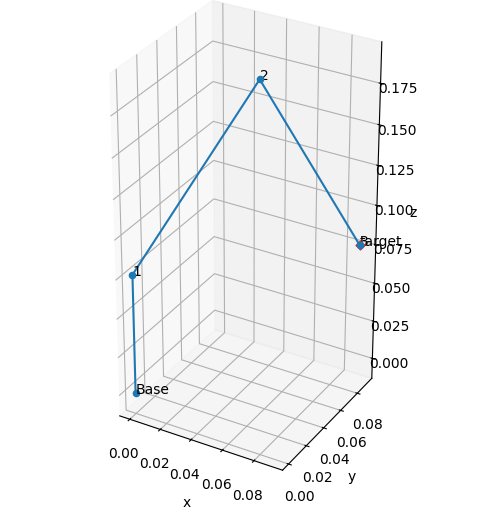

In [480]:
# -----------------------------------------------------------------------------
# Parameter robots
# -----------------------------------------------------------------------------

# Dimensions acc. to https://emanual.robotis.com/docs/en/platform/openmanipulator_x/specification/#hardware-specification

L_1 = 0.077
L_2 = np.sqrt(0.128**2 + 0.024**2)
L_3 = 0.124


# -----------------------------------------------------------------------------
# Inputs : position wrist w.r.t. base
# -----------------------------------------------------------------------------

x = L_2*0.99*np.sqrt(2)/2
y = L_2*0.99*np.sqrt(2)/2
z = (L_1)*0.99


# -----------------------------------------------------------------------------
# Main
# -----------------------------------------------------------------------------

# Dist. bw. wrist and base
r = np.sqrt(x**2 + y**2 + (z-L_1)**2)

# Check that required position is in the workspace of the robot
# Workspace = sphere with radius L_2 + L_3 centered on joint 1 and trimmed by
# the horizontal plane of the base
wrist_in_sphere = r <= L_2 + L_3
wrist_above_base_plane = z >= 0
wrist_in_workspace = np.logical_and(wrist_in_sphere, wrist_above_base_plane)

if wrist_in_workspace == False :
    sys.exit('required position not in workspace')


# Projection dist. bw. wrist and base on horizontal plane
k = np.sqrt(x**2 + y**2)

# theta_1. Measured w.r.t. direction x0
theta_1 = np.arctan2(y, x)

# theta_2. Measured w.r.t. horizontal plane
alpha = np.arctan2(z-L_1, k)

num = L_3**2 - L_2**2 - r**2
den = -2*L_2*r
beta = np.arccos(num/den)

theta_2 = alpha + beta

# theta_3. Measred w.r.t. direction of L_2
num = r**2 - L_2**2 - L_3**2
den = -2*L_2*L_3
print(num/den)
theta_3 = np.pi + np.arccos(num/den)


# -----------------------------------------------------------------------------
# Tests
# -----------------------------------------------------------------------------

# Solutions
print (np.rad2deg(theta_1))
print (np.rad2deg(theta_2))
print (np.rad2deg(theta_3))

# Positions
x_joint_1_wrt_base = 0
y_joint_1_wrt_base = 0
z_joint_1_wrt_base = L_1

x_joint_2_wrt_joint_1 = L_2*np.cos(theta_2)*np.cos(theta_1)
y_joint_2_wrt_joint_1 = L_2*np.cos(theta_2)*np.sin(theta_1)
z_joint_2_wrt_joint_1 = L_2*np.sin(theta_2)

x_joint_3_wrt_joint_2 = L_3*np.cos(theta_2+theta_3)*np.cos(theta_1)
y_joint_3_wrt_joint_2 = L_3*np.cos(theta_2+theta_3)*np.sin(theta_1)
z_joint_3_wrt_joint_2 = L_3*np.sin(theta_2+theta_3)

x_joint_2_wrt_base = x_joint_2_wrt_joint_1 + x_joint_1_wrt_base
y_joint_2_wrt_base = y_joint_2_wrt_joint_1 + y_joint_1_wrt_base
z_joint_2_wrt_base = z_joint_2_wrt_joint_1 + z_joint_1_wrt_base

x_joint_3_wrt_base = x_joint_3_wrt_joint_2 + x_joint_2_wrt_base
y_joint_3_wrt_base = y_joint_3_wrt_joint_2 + y_joint_2_wrt_base
z_joint_3_wrt_base = z_joint_3_wrt_joint_2 + z_joint_2_wrt_base

# Plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, marker='D', color='tab:red')
ax.text(x, y, z, 'target')

ax.scatter(0, 0, 0, marker='o', color='tab:blue')
ax.text(0, 0, 0, 'Base')

ax.scatter(x_joint_1_wrt_base, y_joint_1_wrt_base, z_joint_1_wrt_base, marker='o', color='tab:blue')
ax.text(x_joint_1_wrt_base, y_joint_1_wrt_base, z_joint_1_wrt_base, '1')

ax.scatter(x_joint_2_wrt_base, y_joint_2_wrt_base, z_joint_2_wrt_base, marker='o', color='tab:blue')
ax.text(x_joint_2_wrt_base, y_joint_2_wrt_base, z_joint_2_wrt_base, '2')

ax.scatter(x_joint_3_wrt_base, y_joint_3_wrt_base, z_joint_3_wrt_base, marker='o', color='tab:blue')
ax.text(x_joint_3_wrt_base, y_joint_3_wrt_base, z_joint_3_wrt_base, '3')

ax.plot([0, x_joint_1_wrt_base],
        [0, y_joint_1_wrt_base],
        [0, z_joint_1_wrt_base], linestyle='-', color='tab:blue')

ax.plot([x_joint_1_wrt_base, x_joint_2_wrt_base],
        [y_joint_1_wrt_base, y_joint_2_wrt_base],
        [z_joint_1_wrt_base, z_joint_2_wrt_base], linestyle='-', color='tab:blue')

ax.plot([x_joint_2_wrt_base, x_joint_3_wrt_base],
        [y_joint_2_wrt_base, y_joint_3_wrt_base],
        [z_joint_2_wrt_base, z_joint_3_wrt_base], linestyle='-', color='tab:blue')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

#### Matlab

Matlab code to control the robot can be found in the directory

### Polynomial Interpolation

Developed by Emily. Full code can be found in the directory

In [481]:
def fit_poly(inds=[1,7,43,49]):
    # v_data = pd.read_csv('participants_vh_unbraced_data/P07_v_data.csv')
    data = pd.read_csv('P07_h_allintervals.csv')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    trajs = []
    for i in inds:
        filter = np.where(data['interval_label'] == i)

        wrist_x = np.array(data['Scaled_Wrist_x'])[filter]
        wrist_y = np.array(data['Scaled_Wrist_y'])[filter]
        wrist_z = np.array(data['Scaled_Wrist_z'])[filter]
        wrist_angle = np.array(data['h_Wrist_Angle_y_rad'])[filter]

        X = wrist_x.reshape(len(wrist_x), 1)
        poly = PolynomialFeatures(12)
        X = poly.fit_transform(X)
        y = np.column_stack((wrist_y, wrist_z, wrist_angle))
        model = LinearRegression()
        model.fit(X, y)
        X_plot = wrist_x
        X_inter = poly.transform(X_plot.reshape(len(wrist_x), 1))
        y_plot = model.predict(X_inter)

        sc = ax.scatter(wrist_x, y_plot[:,0],y_plot[:,1],s=2)
        sc = ax.scatter(wrist_x, wrist_y, wrist_z, c = np.arange(len(wrist_x)), s=2, cmap='viridis')
        trajs.append((poly, model))
    plt.xlabel('x', fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.colorbar(sc, label='Time')

    return trajs, ax

def get_traj(trajs, ax, goal_y, goal_z):
    xs = np.linspace(0.03, 0.115, 200)

    ys = []
    for traj in trajs:
        poly = traj[0]
        model = traj[1]
        X_inter = poly.transform(xs.reshape(len(xs), 1))
        y_plot = model.predict(X_inter)
        ys.append(y_plot)

    # [goal_y, goal_z] = ys[-1,:] * w
    sol = np.linalg.lstsq(np.array(ys)[:,-1,:2].T, np.array([goal_y, goal_z]).T)[0]
    print("SOL", sol)
    means = []
    for i in range(np.array(ys).shape[1]):
        means.append(sol @ np.array(ys)[:,i,:])
        # print(sol @ np.array(ys)[:,i,:])
    means = np.array(means)
    print(means[-1,:2])
    sc = ax.scatter(xs, means[:,0], means[:,1],s=2)

    df = pd.DataFrame(data=np.column_stack((xs, means[:,0], means[:,1], means[:,2])), \
                      columns=['Scaled_Wrist_x', 'Scaled_Wrist_y', 'Scaled_Wrist_z', 'h_Wrist_Angle_y_rad'])
    df.to_csv('interpolation_goal_0.06_0.1_20.csv')

### Conditional Variable Autoencoder

Given a goal location, generate trajectories to reach the goal location.

In [440]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pad all trajectories to the same length
def pad_traj(traj, max_len):
    pad_width = ((0, max_len - traj.shape[0]), (0, 0))
    return np.pad(traj, pad_width, mode='constant')

padded_pairs = [(goal, pad_traj(traj, max_len)) for goal, traj in trajectory_goal_pairs]

# Stack for scaling
goals = np.stack([g for g, _ in padded_pairs])
trajectories = np.stack([t for _, t in padded_pairs])  # shape: (N, max_len, 3)

# Scale
goal_scaler = StandardScaler()
traj_scaler = StandardScaler()
goals_scaled = goal_scaler.fit_transform(goals)
traj_flat = trajectories.reshape(-1, 3)
traj_flat_scaled = traj_scaler.fit_transform(traj_flat)
trajectories_scaled = traj_flat_scaled.reshape(trajectories.shape)

# Dataset class
class TrajectoryDataset(Dataset):
    def __init__(self, goals, trajectories):
        self.goals = torch.tensor(goals, dtype=torch.float32)
        self.trajectories = torch.tensor(trajectories, dtype=torch.float32)
    def __len__(self):
        return len(self.goals)
    def __getitem__(self, idx):
        return self.goals[idx], self.trajectories[idx]

dataset = TrajectoryDataset(goals_scaled, trajectories_scaled)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# CVAE Model
class CVAE(nn.Module):
    def __init__(self, goal_dim=3, traj_dim=3, latent_dim=16, seq_len=220, hidden_dim=128):
        super(CVAE, self).__init__()
        self.seq_len = seq_len
        self.latent_dim = latent_dim
        self.goal_dim = goal_dim
        self.traj_dim = traj_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(goal_dim + traj_dim * seq_len, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(goal_dim + latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, traj_dim * seq_len)
        )

    def encode(self, goal, trajectory):
        # goal: (batch, 3), trajectory: (batch, seq_len, 3)
        batch = goal.shape[0]
        traj_flat = trajectory.view(batch, -1)
        x = torch.cat([goal, traj_flat], dim=1)
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, goal, z):
        # goal: (batch, 3), z: (batch, latent_dim)
        x = torch.cat([goal, z], dim=1)
        out = self.decoder(x)
        return out.view(-1, self.seq_len, self.traj_dim)

    def forward(self, goal, trajectory):
        mu, logvar = self.encode(goal, trajectory)
        z = self.reparameterize(mu, logvar)
        recon_traj = self.decode(goal, z)
        return recon_traj, mu, logvar

# Loss function
def loss_function(recon_x, x, mu, logvar):
    recon_loss = nn.MSELoss()(recon_x, x)
    kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / x.size(0)
    return recon_loss + kld * 1e-4

# Training
seq_len = max_len
model = CVAE(goal_dim=3, traj_dim=3, latent_dim=32, seq_len=seq_len, hidden_dim=256)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(500):
    model.train()
    for g, t in dataloader:
        optimizer.zero_grad()
        recon, mu, logvar = model(g, t)
        loss = loss_function(recon, t, mu, logvar)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

Epoch 5, Loss: 0.098779
Epoch 10, Loss: 0.090057
Epoch 15, Loss: 0.068991
Epoch 20, Loss: 0.060385
Epoch 25, Loss: 0.061373
Epoch 30, Loss: 0.053783
Epoch 35, Loss: 0.038262
Epoch 40, Loss: 0.038184
Epoch 45, Loss: 0.030133
Epoch 50, Loss: 0.061939
Epoch 55, Loss: 0.039294
Epoch 60, Loss: 0.045961
Epoch 65, Loss: 0.036041
Epoch 70, Loss: 0.034658
Epoch 75, Loss: 0.043383
Epoch 80, Loss: 0.026145
Epoch 85, Loss: 0.026617
Epoch 90, Loss: 0.032837
Epoch 95, Loss: 0.028024
Epoch 100, Loss: 0.033048
Epoch 105, Loss: 0.021531
Epoch 110, Loss: 0.026100
Epoch 115, Loss: 0.018073
Epoch 120, Loss: 0.026945
Epoch 125, Loss: 0.022944
Epoch 130, Loss: 0.025643
Epoch 135, Loss: 0.026912
Epoch 140, Loss: 0.020211
Epoch 145, Loss: 0.018139
Epoch 150, Loss: 0.021193
Epoch 155, Loss: 0.022087
Epoch 160, Loss: 0.032908
Epoch 165, Loss: 0.022775
Epoch 170, Loss: 0.027976
Epoch 175, Loss: 0.016384
Epoch 180, Loss: 0.021228
Epoch 185, Loss: 0.024520
Epoch 190, Loss: 0.017769
Epoch 195, Loss: 0.017032
Epoch 

In [443]:
# Inference function to generate a trajectory given a goal
def generate_trajectory(model, goal, scaler_goal, scaler_traj, seq_len):
    model.eval()
    goal_scaled = scaler_goal.transform(goal.reshape(1, -1))
    z = torch.randn(1, model.latent_dim)
    goal_tensor = torch.tensor(goal_scaled, dtype=torch.float32)
    with torch.no_grad():
        gen_traj = model.decode(goal_tensor, z).numpy()[0]
    # Inverse scale
    gen_traj_unscaled = scaler_traj.inverse_transform(gen_traj)
    return gen_traj_unscaled

In [444]:
# Example 
goal = np.array([884.086, -114.681, 1197.07])
generated_traj = generate_trajectory(model, goal, goal_scaler, traj_scaler, seq_len)

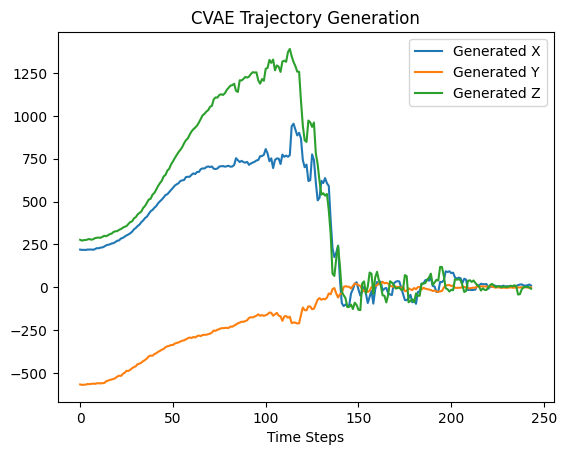

In [468]:
plt.title("CVAE Trajectory Generation")
plt.xlabel("Time Steps")
plt.plot(generated_traj[:, 0], label="Generated X")
plt.plot(generated_traj[:, 1], label="Generated Y")
plt.plot(generated_traj[:, 2], label="Generated Z")
plt.legend()

In [453]:
real_length = actual_traj.shape[0]  # e.g., 159
gen_traj_to_compare = generated_traj[:real_length]  

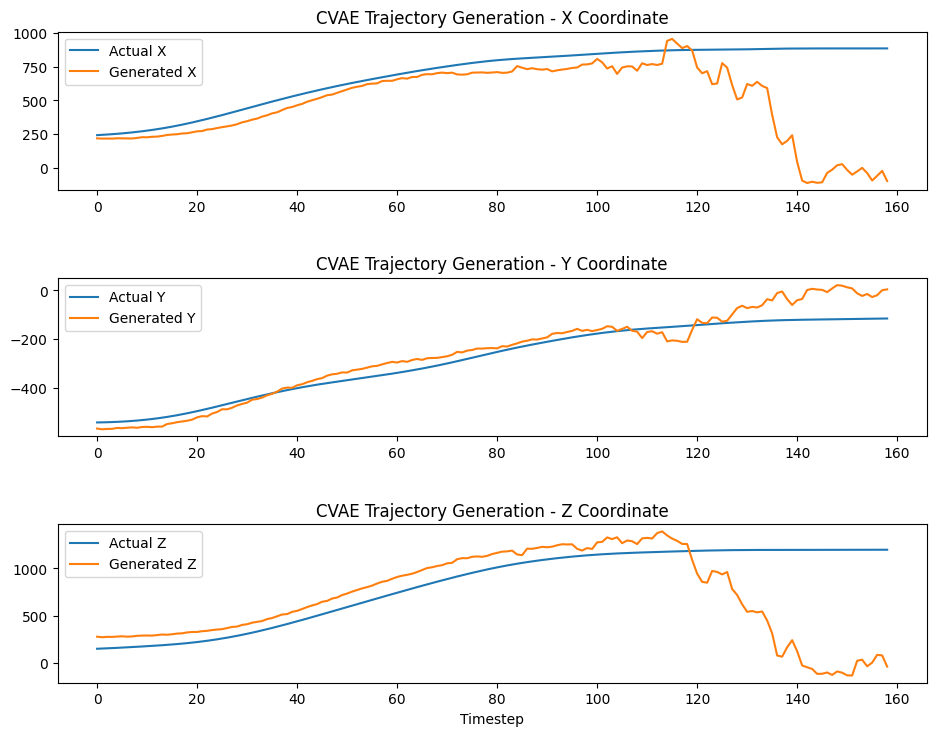

In [464]:
plt.figure(figsize=(10, 8)) 
plt.subplot(3, 1, 1)


t = np.arange(real_length)
plt.plot(t, actual_traj[:,0], label='Actual X')
plt.plot(t, gen_traj_to_compare[:,0], label='Generated X')
plt.title('CVAE Trajectory Generation - X Coordinate')
plt.legend()

# Y
plt.subplot(3, 1, 2)
plt.plot(t, actual_traj[:,1], label='Actual Y')
plt.plot(t, gen_traj_to_compare[:, 1], label='Generated Y')
plt.title('CVAE Trajectory Generation - Y Coordinate')
plt.legend()

# Z
plt.subplot(3, 1, 3)
plt.plot(t, actual_traj[:, 2], label='Actual Z')
plt.plot(t, gen_traj_to_compare[:, 2], label='Generated Z')
plt.title('CVAE Trajectory Generation - Z Coordinate')
plt.legend()

plt.xlabel('Timestep')
plt.tight_layout(pad=3.0)
plt.show()


In [482]:
fig = go.Figure()

# Actual trajectory
fig.add_trace(go.Scatter3d(
    x=trajectories[0][:, 0],
    y=trajectories[0][:, 1],
    z=trajectories[0][:, 2],
    mode='lines+markers',
    name='Actual Trajectory',
    line=dict(color='blue'),
    marker=dict(size=2)
))

# Generated trajectory
fig.add_trace(go.Scatter3d(
    x=generated_traj[:, 0],
    y=generated_traj[:, 1],
    z=generated_traj[:, 2],
    mode='lines+markers',
    name='Generated Trajectory',
    line=dict(color='red'),
    marker=dict(size=2)
))

fig.update_layout(
    title='3D Trajectory Comparison: Actual vs Generated',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    legend=dict(x=0.02, y=0.98)
)

fig.show()


In [394]:
# 7. Save the trained model
torch.save(model.state_dict(), "cvae_trained_model_updated.pth")
print("Model saved as cvae_trained_model.pth")

Model saved as cvae_trained_model.pth


In [483]:
gen_traj_to_plot = g

def mse_trajectory(generated, actual, mask=None):
    # generated, actual: (seq_len, 3)
    # mask: (seq_len,) or None
    diff = (generated - actual) ** 2
    if mask is not None:
        diff = diff * mask[:, None]
        return diff.sum() / mask.sum() / 3
    return diff.mean()

mse_trajectory(generated_traj, trajectories[0], masks[0])

np.float32(126794.23)

In [484]:
def trajectory_jerk(traj, mask=None):
    # traj: (seq_len, 3)
    jerk = traj[3:] - 3*traj[2:-1] + 3*traj[1:-2] - traj[:-3]
    if mask is not None:
        jerk = jerk * mask[3:, None]
        return np.mean(jerk ** 2)
    return np.mean(jerk ** 2)
trajectory_jerk(generated_traj, masks[0])

np.float32(3016.1538)

In [485]:
def trajectory_diversity(trajs):
    # trajs: (num_samples, seq_len, 3)
    mean_traj = trajs.mean(axis=0)
    return np.mean((trajs - mean_traj) ** 2)

trajectory_diversity(generated_traj)

np.float32(126754.88)

In [487]:
## Load model

model = CVAE(goal_dim=3, traj_dim=3, latent_dim=16, seq_len=seq_len, hidden_dim=128)
model.load_state_dict(torch.load("cvae_trained_model.pth"))
model.eval()

CVAE(
  (encoder): Sequential(
    (0): Linear(in_features=735, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
  )
  (fc_mu): Linear(in_features=128, out_features=16, bias=True)
  (fc_logvar): Linear(in_features=128, out_features=16, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=19, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=732, bias=True)
  )
)

### Miscellaneous

In [492]:
# -----------------------------------------------------------------------------
# Inputs : position wrist w.r.t. base
# -----------------------------------------------------------------------------

def get_wrist_position(human_x, human_y, human_z):
    scaled_x = human_x / 10000
    scaled_y = human_y / 10000
    scaled_z = human_z / 10000

    x = L_2 * scaled_x * np.sqrt(2) / 2
    y = L_2 * scaled_y * np.sqrt(2) / 2
    z = L_1 * scaled_z

    r = np.sqrt(x**2 + y**2 + (z - L_1)**2)

    wrist_in_sphere = r <= L_2 + L_3
    wrist_above_base_plane = z >= 0
    wrist_in_workspace = np.logical_and(wrist_in_sphere, wrist_above_base_plane)

    if not wrist_in_workspace:
        return {"error": "Wrist position is not in the workspace of the robot"}

    k = np.sqrt(x**2 + y**2)
    theta_1 = np.arctan2(y, x)
    alpha = np.arctan2(z - L_1, k)
    num = L_3**2 - L_2**2 - r**2
    den = -2 * L_2 * r
    beta = np.arccos(num / den)
    theta_2 = alpha + beta
    num2 = r**2 - L_2**2 - L_3**2
    den2 = -2 * L_2 * L_3
    theta_3 = np.pi + np.arccos(num2 / den2)

    x_joint_1_wrt_base = 0
    y_joint_1_wrt_base = 0
    z_joint_1_wrt_base = L_1

    x_joint_2_wrt_joint_1 = L_2 * np.cos(theta_2) * np.cos(theta_1)
    y_joint_2_wrt_joint_1 = L_2 * np.cos(theta_2) * np.sin(theta_1)
    z_joint_2_wrt_joint_1 = L_2 * np.sin(theta_2)

    x_joint_2_wrt_base = x_joint_2_wrt_joint_1 + x_joint_1_wrt_base
    y_joint_2_wrt_base = y_joint_2_wrt_joint_1 + y_joint_1_wrt_base
    z_joint_2_wrt_base = z_joint_2_wrt_joint_1 + z_joint_1_wrt_base

    x_joint_3_wrt_joint_2 = L_3 * np.cos(theta_2 + theta_3) * np.cos(theta_1)
    y_joint_3_wrt_joint_2 = L_3 * np.cos(theta_2 + theta_3) * np.sin(theta_1)
    z_joint_3_wrt_joint_2 = L_3 * np.sin(theta_2 + theta_3)

    x_joint_3_wrt_base = x_joint_3_wrt_joint_2 + x_joint_2_wrt_base
    y_joint_3_wrt_base = y_joint_3_wrt_joint_2 + y_joint_2_wrt_base
    z_joint_3_wrt_base = z_joint_3_wrt_joint_2 + z_joint_2_wrt_base

    return {
        "x_joint_1_wrt_base": x_joint_1_wrt_base,
        "y_joint_1_wrt_base": y_joint_1_wrt_base,
        "z_joint_1_wrt_base": z_joint_1_wrt_base,
        "x_joint_2_wrt_base": x_joint_2_wrt_base,
        "y_joint_2_wrt_base": y_joint_2_wrt_base,
        "z_joint_2_wrt_base": z_joint_2_wrt_base,
        "x_joint_3_wrt_base": x_joint_3_wrt_base,
        "y_joint_3_wrt_base": y_joint_3_wrt_base,
        "z_joint_3_wrt_base": z_joint_3_wrt_base,
        "scaled_x": scaled_x,
        "scaled_y": scaled_y,
        "scaled_z": scaled_z,
        "theta_1": theta_1,
        "theta_2": theta_2,
        "theta_3": theta_3,
    }


In [493]:
all_results = p07_v_data.apply(
    lambda row: get_wrist_position(row['v_Wrist_x'], row['v_Wrist_y'], row['v_Wrist_z']),
    axis=1
)

all_results = pd.DataFrame(all_results.tolist())
all_results

x_joint_1_wrt_base  y_joint_1_wrt_base  z_joint_1_wrt_base  \
0                     0.0                 0.0               0.077   
1                     0.0                 0.0               0.077   
2                     0.0                 0.0               0.077   
3                     0.0                 0.0               0.077   
4                     0.0                 0.0               0.077   
...                   ...                 ...                 ...   
18574                 0.0                 0.0               0.077   
18575                 0.0                 0.0               0.077   
18576                 0.0                 0.0               0.077   
18577                 0.0                 0.0               0.077   
18578                 0.0                 0.0               0.077   

       x_joint_2_wrt_base  y_joint_2_wrt_base  z_joint_2_wrt_base  \
0                0.058394           -0.109290            0.036926   
1                0.058276           -0.109352            0.036926   
2                0.058180           -0.109404            0.036927   
3                0.058101           -0.109446            0.036928   
4                0.058031           -0.109484            0.036930   
...                   ...                 ...                 ...   
18574            0.055790           -0.110728            0.037167   
18575            0.055846           -0.110700            0.037165   
18576            0.055902           -0.110671            0.037163   
18577            0.055957           -0.110642            0.037162   
18578            0.056012           -0.110614            0.037160   

       x_joint_3_wrt_base  y_joint_3_wrt_base  z_joint_3_wrt_base  scaled_x  \
0                0.002430           -0.004548            0.001244  0.026387   
1                0.002425           -0.004550            0.001245  0.026334   
2                0.002421           -0.004553            0.001246  0.026291   
3                0.002418           -0.004555            0.001247  0.026257   
4                0.002415           -0.004557            0.001248  0.026229   
...                   ...                 ...                 ...       ...   
18574            0.002384           -0.004732            0.001269  0.025892   
18575            0.002386           -0.004730            0.001269  0.025913   
18576            0.002388           -0.004728            0.001269  0.025934   
18577            0.002390           -0.004726            0.001269  0.025954   
18578            0.002392           -0.004724            0.001269  0.025975   

       scaled_y  scaled_z   theta_1   theta_2   theta_3 error  
0     -0.049386  0.016157 -1.080082 -0.312793  3.746268   NaN  
1     -0.049414  0.016168 -1.081159 -0.312790  3.746261   NaN  
2     -0.049439  0.016181 -1.082038 -0.312783  3.746253   NaN  
3     -0.049462  0.016196 -1.082762 -0.312774  3.746244   NaN  
4     -0.049484  0.016212 -1.083404 -0.312761  3.746234   NaN  
...         ...       ...       ...       ...       ...   ...  
18574 -0.051388  0.016481 -1.104073 -0.310851  3.746144   NaN  
18575 -0.051365  0.016482 -1.103572 -0.310863  3.746142   NaN  
18576 -0.051342  0.016484 -1.103064 -0.310876  3.746141   NaN  
18577 -0.051318  0.016484 -1.102557 -0.310890  3.746140   NaN  
18578 -0.051295  0.016485 -1.102059 -0.310904  3.746139   NaN  

[18579 rows x 16 columns]

In [494]:
# Create traces for each joint trajectory
fig = go.Figure()

# Joint 1 subplot
fig.add_trace(go.Scatter3d(
    x=all_results['x_joint_1_wrt_base'], y=all_results['y_joint_1_wrt_base'], z=all_results['z_joint_1_wrt_base'],
    mode='markers',
    marker=dict(size=2, showscale=False, color='blue'),
    name='Joint 1'
))

# Joint 2 subplot
fig.add_trace(go.Scatter3d(
    x=all_results['x_joint_2_wrt_base'], y=all_results['y_joint_2_wrt_base'], z=all_results['z_joint_2_wrt_base'],
    mode='markers',
    marker=dict(size=2, showscale=False, color='green'),
    name='Joint 2'
))

# Joint 3 subplot
fig.add_trace(go.Scatter3d(
    x=all_results['x_joint_3_wrt_base'], y=all_results['y_joint_3_wrt_base'], z=all_results['z_joint_3_wrt_base'],
    mode='markers',
    marker=dict(size=2, showscale=False, color='red'),
    name='Joint 3'
))


# # Update layout
fig.update_layout(
    title='3D Trajectories Wrist',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show the plot
fig.show()


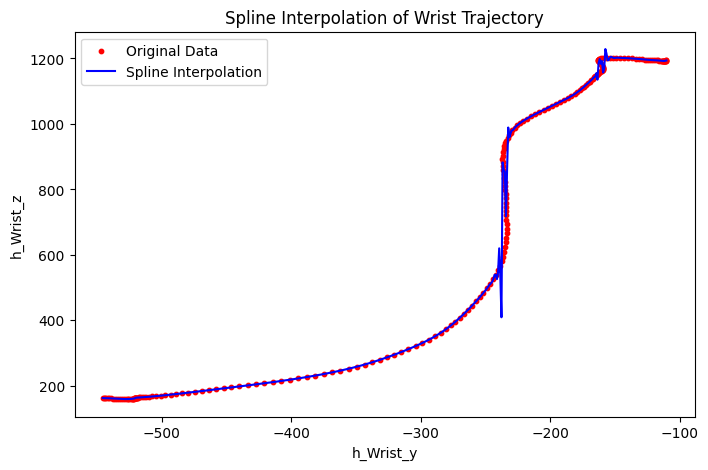

In [ ]:
from scipy.interpolate import UnivariateSpline
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("test.csv")
y = df['h_Wrist_y'].values
z = df['h_Wrist_z'].values

# Sort by y
sorted_indices = np.argsort(y)
y_sorted = y[sorted_indices]
z_sorted = z[sorted_indices]

# Fit spline
spline = UnivariateSpline(y_sorted, z_sorted, s=0)

# Interpolate
y_interp = np.linspace(y_sorted.min(), y_sorted.max(), 500)
z_interp = spline(y_interp)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y, z, color='red', label='Original Data', s=10)
plt.plot(y_interp, z_interp, color='blue', label='Spline Interpolation')
plt.xlabel('h_Wrist_y')
plt.ylabel('h_Wrist_z')
plt.title('Spline Interpolation of Wrist Trajectory')
plt.legend()
plt.show()
